In [1]:
import shutil
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('../')
from torchsummary.torchsummary import summary
from dataloaderNoob import VOC
import numpy as np
import matplotlib.pyplot as plt
import yolov1
from yolov1 import detection_collate
from yolov1 import detection_loss
from yolov1 import save_checkpoint
import cv2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
DATASET_PATH_MARTIN = "/media/keti-ai/AI_HARD3/DataSets/VOC_Pascal/VOC/VOCdevkit/VOC2012"
DATASET_PATH_JAEWON = "H:\VOC\VOC12\VOCdevkit_2\VOC2012"
SMALL_DATASET_PATH = "D:/dataset/person-300"
train_dataset = VOC(root = SMALL_DATASET_PATH,
                    transform=transforms.ToTensor(), cls_option = True, selective_cls="person")


VOC Parsing:   |████████████████████████████████████████| 100.0% (300/300)  Complete


YOLO Generating:|████████████████████████████████████████| 100.0% (300/300)  Complete



In [5]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size = 1,
                                           shuffle = True,
                                           collate_fn=detection_collate_test)

    # label tensor slice
    objness_label = target[:, :, :, 0]
    class_label = target[:, :, :, 1]
    x_offset_label = target[:, :, :, 2]
    y_offset_label = target[:, :, :, 3]
    width_ratio_label = target[:, :, :, 4]
    height_ratio_label = target[:, :, :, 5]

(500, 375)
1t: <class 'list'>
2t: 1
3t: 6
4t: 1
5t: 1
1
<class 'numpy.ndarray'>
<class 'tuple'>
<class 'torch.Tensor'>
tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])
tensor([[ 500.,  375.]])


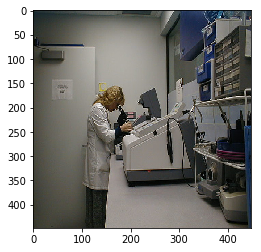

In [278]:
iterator = iter(train_loader)
image, label, size= iterator.next()
#label = np.transpose(label,(0,2,1,3))
plt.imshow(np.transpose(image[0],(1,2,0)))
print(label[0,:,:,0])
print(size)

In [268]:
X

2

(array([1], dtype=int64), array([3], dtype=int64))
size : tensor([[ 500.,  375.]])
X_index : 3
Y_index : 3
idx_norm : tensor(1.00000e-02 *
       5.0286)
idy_norm : tensor(1.00000e-02 *
       9.9571)
width : tensor(94.)
height : tensor(247.1250)
idx_norm : tensor(1.00000e-02 *
       5.0286)
idy_norm : tensor(1.00000e-02 *
       9.9571)


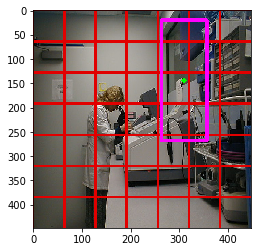

In [279]:
result = np.where(label[0,:,:,0]==1)
print(result)
print('size :', size)
X_index = result[1][0]
Y_index = result[0][0]
print('X_index :', X)
print('Y_index :', Y)


idx_norm = label[0,Y_index,X_index,2]
idy_norm = label[0,Y_index,X_index,3]
print('idx_norm :', idx_norm)
print('idy_norm :', idy_norm)
width = label[0,Y_index,X_index,4] * size[0][0]
height = label[0,Y_index,X_index,5] * size[0][1]


x = (idx_norm + (X_index + 1) / 7) * size[0][0]
y = (idy_norm + (Y_index + 1) / 7) * size[0][1]

idx = idx_norm * width
idy = idy_norm * height

print('width :', width)
print('height :', height)
print('idx_norm :', idx_norm)
print('idy_norm :', idy_norm)
#print('x :', x)
#print('y :', y)

src = np.transpose(image[0],(1,2,0))
src = src * 255
src = src.numpy().astype(np.uint8).copy()

for i in range(7):
    img = cv2.line(src, (64*i, 0), (64*i, 447), (225,0,0), 3)
    img = cv2.line(src, (0, 64*i), (447, 64*i), (225,0,0), 3)

cv2.rectangle(src,(x - width/2,y - height/2),(x + width/2,y + height/2),(255,0,255),5)
#cv2.circle(src,(Y*64,X*64),2,(255,255,0),6)
#cv2.circle(src,(Y*64+idy,X*64+idx),2,(0,255,0),6)
cv2.circle(src,(x,y),2,(0,255,0),6)
#cv2.rectangle(src,(Y*64+32+idy,X*64+32+idx),(width+32+idx,height+32+idy),(255,0,0),5)
plt.imshow(src)

In [ ]:
height = label[0,idY,idX,5]
label[0,0,idX,5]

In [ ]:
label[0,:,:,4]

In [205]:
print(label[0,Y,X,5])
print((489-13)/500)

tensor(0.9520)
0.952


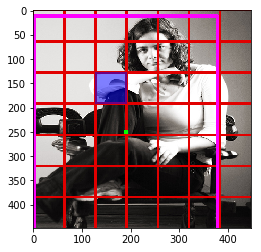

In [197]:
def drawRectInGrid(src,X,Y):
    dst = src.copy()
    dst = cv2.rectangle(dst,(64*X,64*Y),(64*X+64,64*Y+64),(0,0,255),-1)
    return dst

dst = drawRectInGrid(src,X,Y)
plt.imshow((dst/2 + src/2).astype(np.uint8))

In [227]:
def calcMinMaxXY(indice_xy, norm_xywh, original_wh):
    x_index = indice_xy[0] + 1
    y_index = indice_xy[1] + 1
        
    width = norm_xywh[2] * original_wh[0]
    height = norm_xywh[3] * original_wh[1]

    center_x = (norm_xywh[0] + x_index / 7) * original_wh[0]
    center_y = (norm_xywh[1] + y_index / 7) * original_wh[1]
    
    xMin = center_x - width / 2
    yMin = center_y - height / 2
    xMax = center_x + width / 2
    yMax = center_y + height / 2

    return xMin, yMin, xMax, yMax, center_x, center_y, width, height

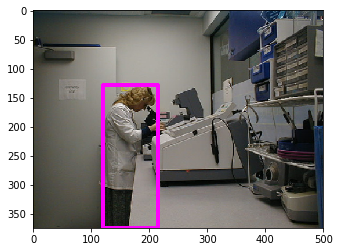

In [287]:
result = np.where(label[0,:,:,0]==1)
X = result[1][0]
Y = result[0][0]
src = np.transpose(image[0],(1,2,0))
src = src * 255
src = src.numpy().astype(np.uint8).copy()

indice_xy = [result[0][0], result[1][0]]
norm_xywh = [label[0,Y,X,2],label[0,Y,X,3],label[0,Y,X,4],label[0,Y,X,5]]
original_wh = [size[0][0],size[0][1]]

result = calcMinMaxXY(indice_xy, norm_xywh, original_wh)
dst = cv2.resize(src, (original_wh[0],original_wh[1]))
dst = cv2.rectangle(dst,(result[0], result[1]),(result[2], result[3]),(255,0,255),5)
plt.imshow(dst)

In [282]:
result

(tensor(121.0000),
 tensor(128.0625),
 tensor(215.0000),
 tensor(375.1875),
 tensor(168.0000),
 tensor(251.6250),
 tensor(94.),
 tensor(247.1250))

In [247]:
result = np.where(label[0,:,:,0]==1)
result[1][0]

2